<a href="https://colab.research.google.com/github/550tealeaves/DATA71200_sum2024_550/blob/main/data71200class5lab_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Import Wine Dataset

In [2]:
from sklearn.datasets import load_wine
wine_dataset = load_wine()

# Testing/Training Split

In [3]:
#stratify based on target and split it 80/20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    wine_dataset.data, wine_dataset.target, stratify=wine_dataset.target, random_state=66,test_size=0.2)

# Import KNN Classifier
Based on the knn score - doesn't look like k=4 is good at all


In [4]:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
# k = 4
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
print("knn score: {}".format(knn.score(X_train, y_train)))

knn score: 0.823943661971831


In [18]:
# create a validation split

X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(
    X_train, y_train, stratify=y_train, random_state=66,test_size=0.2)

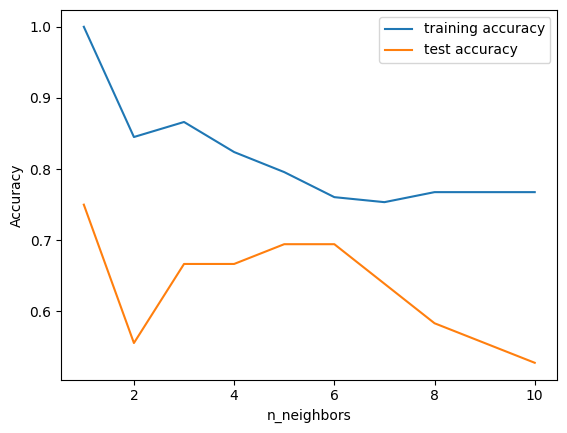

In [19]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
#use for loop to iterate & each time
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train)) #append value of running it on training
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test)) #append value of running it on test
#plot graph
#We see that k=4 probably gives the best performance, after 4, accuracy declines in testing
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

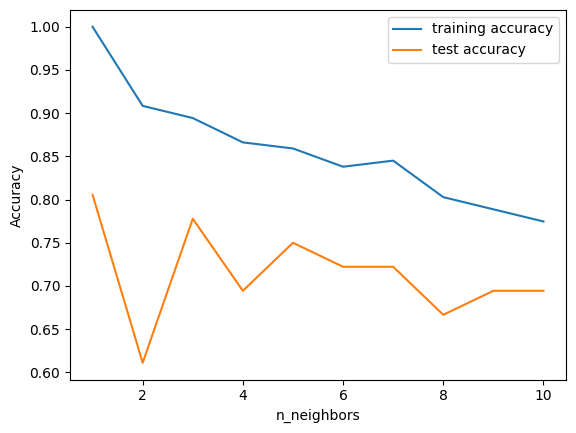

In [20]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,metric='manhattan')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()


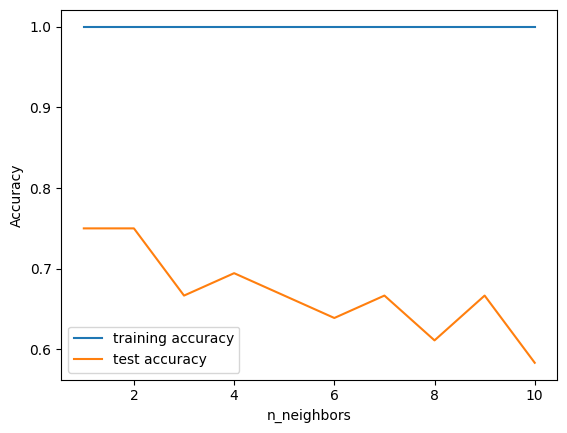

In [21]:
#take inverse of the distance - 4 is the best performance for testing/training accuracy

# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,weights='distance')
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

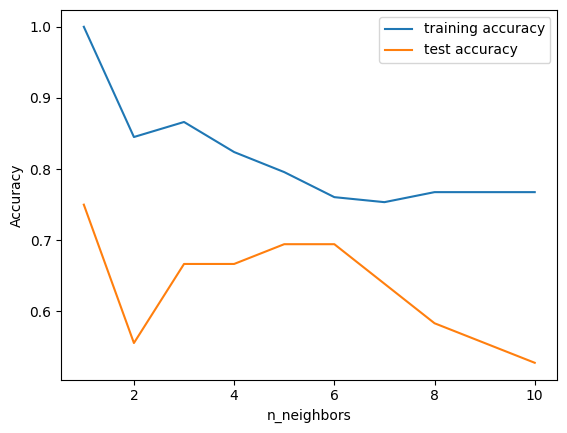

In [22]:
# test with cross validation on test set (common for small datasets)
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm="brute")
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(knn.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# Perform Grid Search

In [23]:
from sklearn.model_selection import GridSearchCV

# parameter validation on training set

knn2 = KNeighborsClassifier() #instantiate vanilla version of classifier

#dictionary of all values of k
#look through all k-values from 1-25
param_grid = {"n_neighbors": np.arange(1, 25)}

#grid search on all values of k in dictionary
knn_gscv = GridSearchCV(knn2, param_grid, cv=5) #pass it grid search, instantiated value, param_grid, #folds
knn_gscv.fit(X_train, y_train) #pass it the training set
#dictionary of all values of k

#grid search on all values of k in dictionary


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [24]:
#best performing k (on training set)
knn_gscv.best_params_

{'n_neighbors': 13}

In [25]:
#accuracy of best performing k
knn_gscv.best_score_

0.7317733990147783

In [26]:
#cross validation results
knn_gscv.cv_results_

{'mean_fit_time': array([0.00110278, 0.00078945, 0.00080338, 0.00074525, 0.00086622,
        0.00074334, 0.00116143, 0.00071321, 0.00073123, 0.00068984,
        0.00076957, 0.00067725, 0.00069423, 0.0006556 , 0.00066772,
        0.00070429, 0.00075393, 0.00103769, 0.00098147, 0.00080175,
        0.0006907 , 0.00071363, 0.00066948, 0.0006649 ]),
 'std_fit_time': array([4.03719259e-04, 1.56863293e-04, 1.69301206e-04, 2.21333612e-05,
        1.30212817e-04, 1.30259484e-05, 1.25942578e-04, 3.20516871e-05,
        3.35965534e-05, 2.46518816e-05, 1.53052725e-04, 3.06742343e-05,
        4.03983802e-05, 1.19660477e-05, 1.24129789e-05, 1.55539574e-05,
        1.01408186e-04, 1.69080069e-04, 2.24420692e-04, 7.70400343e-05,
        1.45400152e-05, 7.56959126e-05, 1.07811606e-05, 7.58965394e-06]),
 'mean_score_time': array([0.00427089, 0.00390439, 0.0033226 , 0.00342898, 0.00343971,
        0.00358677, 0.00420666, 0.00328221, 0.00335226, 0.00310373,
        0.00340238, 0.00320015, 0.00307703, 0.00

# Best Performing

In [27]:
# accuracy of k = ? on testing data
knn8 = KNeighborsClassifier(n_neighbors=13)
knn8.fit(X_train, y_train)
print("knn score: {}".format(knn8.score(X_test, y_test)))

knn score: 0.6111111111111112


# Worst Performing

In [30]:
# accuracy of k = ? on testing data
knn11 = KNeighborsClassifier(n_neighbors=6)
knn11.fit(X_train, y_train)
print("knn score: {}".format(knn11.score(X_test, y_test)))

knn score: 0.6944444444444444


# Import Logistic Regression and Perform Grid Search

In [ ]:
#try increasing max_iter


In [ ]:
#dictionary of all values of c

#grid search on all values of k in dictionary for logist regression


In [ ]:
#best performing c (on training set)


In [ ]:
#accuracy of best performing c


In [ ]:
#cross validation results


# Import Linear SVC and Perform Grid Search

In [ ]:
#dictionary of all values of c

#grid search on all values of c in dictionary for linear svc


In [ ]:
#try increasing max_iter for linear svc and rerun grid search


In [ ]:
#best performing c (on training set)


In [ ]:
#accuracy of best performing c


In [ ]:
#cross validation results


# Best Performing

In [ ]:
# accuracy of C = ? on testing data


In [ ]:
# accuracy of C = ? on testing data


In [ ]:
# accuracy of C = ? on testing data with increased max_iter


# Worst Performing

In [ ]:
# accuracy of C = ? on testing data


In [ ]:
# accuracy of C = ? on testing data
